# Data Sourcing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
loan = pd.read_csv('loan.csv')
print(loan.shape)
loan.head(10)

(39717, 111)


/home/prashant/PythonCode/Jupyter_Virtual_Env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Cleaning

In [3]:
# get the null statistics for each column
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


Remove all the columns that are completely null as they don't provide any info and keeping them for analysis doesn't make any sense. 

In [4]:
loan = loan[loan.columns[~loan.isnull().all()]]
loan.shape

(39717, 57)

In [5]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [6]:
loan['emp_title'].head(10)

0                          NaN
1                        Ryder
2                          NaN
3          AIR RESOURCES BOARD
4     University Medical Group
5         Veolia Transportaton
6    Southern Star Photography
7              MKC Accounting 
8                          NaN
9                    Starbucks
Name: emp_title, dtype: object

In [7]:
loan['zip_code'].head()

0    860xx
1    309xx
2    606xx
3    917xx
4    972xx
Name: zip_code, dtype: object

* **id** is a unique LC assigned Id for the borrower member and can be deleted as it is specific to each borrower.
* Similarly, **member_id** can be removed from the analysis.
* **emp_title, desc, title** is very specific to borrower and is not so common. Since these are not generic, it can be deleted for exploratory data analysis.
* **url** doesn't give any useful info for our business objective i.e. to analyze whether a loan requester can be defaulter. 
* **zip_code** last 2 digits are masked and hence it can be removed from the analysis.

In [8]:
# clearly these columns doesn't make any sense in analysis ... hence dropping them 
cols = ['id','member_id','url','emp_title','desc','title','zip_code']
loan = loan.drop(columns=cols)
loan.shape

(39717, 50)

In [9]:
# getting no of unique values per column
loan.nunique()

loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
mths_since_last_delinq           95
mths_since_last_record          111
open_acc                         40
pub_rec                           5
revol_bal                     21711
revol_util                     1089
total_acc                   

In [10]:
# Dropping all the columns with only one unique value 
#cols = ['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','policy_code',
#      'collections_12_mths_ex_med','pymnt_plan','application_type','initial_list_status']
loan.drop(columns=loan.columns[loan.nunique()==1], inplace=True)
loan.shape

(39717, 41)

In [11]:
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [12]:
loan['emp_length'].isnull().sum()

1075

In [13]:
# we can fill the missing employee length by creating new category like '0' instead of removing 
# the rows as we may lose some important data.
loan.emp_length.fillna('0', inplace = True)

In [14]:
# getting all the columns list with null values
cols = loan.columns[loan.isnull().any()].tolist()
cols

['mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'pub_rec_bankruptcies']

In [15]:
# percentage of null values in each group of loan status for columns having null values
for col in cols:
    print(col, loan.groupby('loan_status')[col].apply(lambda x: x.isnull().sum()/len(x)*100),'\n')

mths_since_last_delinq loan_status
Charged Off    61.933535
Current        68.157895
Fully Paid     65.007587
Name: mths_since_last_delinq, dtype: float64 

mths_since_last_record loan_status
Charged Off    89.728097
Current        95.964912
Fully Paid     93.438543
Name: mths_since_last_record, dtype: float64 

revol_util loan_status
Charged Off    0.284343
Current        0.000000
Fully Paid     0.103187
Name: revol_util, dtype: float64 

last_pymnt_d loan_status
Charged Off    1.261774
Current        0.000000
Fully Paid     0.000000
Name: last_pymnt_d, dtype: float64 

next_pymnt_d loan_status
Charged Off    100.0
Current          0.0
Fully Paid     100.0
Name: next_pymnt_d, dtype: float64 

last_credit_pull_d loan_status
Charged Off    0.017771
Current        0.000000
Fully Paid     0.003035
Name: last_credit_pull_d, dtype: float64 

pub_rec_bankruptcies loan_status
Charged Off    2.097032
Current        0.000000
Fully Paid     1.757208
Name: pub_rec_bankruptcies, dtype: float64 



* **mths_since_last_delinq, mths_since_last_record, next_pymnt_d** - for each category of loan status, around majority percent of data is missing, so dropping these columns for further analysis would be better instead of removing the rows as 90% of data will be lost and imputing the missing values for large dataset may give you wrong results.

* **revol_util**, **last_pymnt_d**, **last_credit_pull_d** & **pub_rec_bankruptcies** - Rows having null values in these columns can be dropped as percentage of missing values is mostly less than 1%.

In [16]:
loan.drop(columns=['mths_since_last_delinq','mths_since_last_record', 'next_pymnt_d'], 
          inplace=True)
loan.shape

(39717, 38)

In [17]:
loan.dropna(inplace=True)
loan.shape

(38902, 38)

In [18]:
# Removing % from interest rate and converting it to numeric type
loan['int_rate'] = loan['int_rate'].apply(lambda x: x.strip('%'))
loan['int_rate'] = loan['int_rate'].astype(float)
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


# Derived Metrics

In [19]:
loan['issue_month'],loan['issue_year'] = loan['issue_d'].str.split('-', 1).str
loan[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
3,Dec-11,Dec,11
4,Dec-11,Dec,11


In [20]:
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
loan['issue_month'] = pd.Categorical(loan['issue_month'],categories=months_order, ordered=True)

In [21]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=slot)

In [22]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=slot)

In [23]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=slot)

# Analysis

In [24]:
loan[['recoveries','collection_recovery_fee','loan_status']].head(50)

,recoveries,collection_recovery_fee,loan_status
0,0.00,0.0000,Fully Paid
1,117.08,1.1100,Charged Off
2,0.00,0.0000,Fully Paid
3,0.00,0.0000,Fully Paid
4,0.00,0.0000,Current
5,0.00,0.0000,Fully Paid
6,0.00,0.0000,Fully Paid
7,0.00,0.0000,Fully Paid
8,189.06,2.0900,Charged Off
9,269.29,2.5200,Charged Off


* **recoveries, collection_recovery_fee** dropping these columns for further analysis as these columns have values for charged off only i.e. when a loan is defaulted and we won't be having these variables at the time when a borrower requests for a loan. 

In [25]:
loan.drop(columns=['recoveries', 'collection_recovery_fee'], inplace=True)
loan.shape

(38902, 41)

* **total_rec_prncp, total_rec_late_fee, total_rec_int, total_rec_prncp, total_rec_int, total_rec_prncp, out_prncp_inv,out_prncp** are the columns that make sense when the loan has already been given to the borrower and hence removing these columns for further analysis.

In [26]:
loan.drop(columns=['total_rec_prncp','total_rec_late_fee','total_rec_int','total_rec_prncp',
                  'total_rec_int','total_rec_prncp','out_prncp_inv','out_prncp'], inplace=True)
loan.shape

(38902, 36)

In [27]:
# Finding numerical data
numeric_data = loan.select_dtypes(include = [np.number])

# Finding categorical data
categorical_data = loan.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features'.format(numeric_data.shape[1], categorical_data.shape[1]))

There are 17 numerical and 19 categorical features


In [28]:
loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
count,38902.000000,38902.000000,38902.000000,38902.000000,38902.000000,3.890200e+04,38902.000000,38902.000000,38902.000000,38902.000000,38902.000000,38902.000000,38902.000000,38902.000000,38902.000000,38902.000000,38902.000000
mean,11255.186751,10980.030590,10555.808178,12.038185,324.927355,6.902727e+04,13.365185,0.145391,0.865997,9.301964,0.055447,13404.467457,22.165801,12219.376833,11758.333522,2706.316702,0.043211
std,7471.530162,7198.859453,7103.751568,3.742338,208.813577,6.318950e+04,6.667650,0.489621,1.067001,4.381219,0.237994,15848.890966,11.391769,9068.258407,8929.631631,4468.576166,0.204218
min,500.000000,500.000000,0.000000,5.420000,16.080000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,33.730000,0.000000,0.010000,0.000000
25%,5500.000000,5500.000000,5000.000000,9.250000,167.340000,4.080000e+04,8.240000,0.000000,0.000000,6.000000,0.000000,3745.000000,14.000000,5599.920800,5323.500000,221.362500,0.000000
50%,10000.000000,9750.000000,9000.000000,11.860000,280.620000,5.930850e+04,13.450000,0.000000,1.000000,9.000000,0.000000,8885.500000,21.000000,9962.222901,9495.860000,554.550000,0.000000
75%,15000.000000,15000.000000,14500.000000,14.610000,430.947500,8.250000e+04,18.630000,0.000000,1.000000,12.000000,0.000000,17088.000000,29.000000,16615.006407,16008.270000,3350.507500,0.000000
max,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,58563.679930,58563.680000,36115.200000,2.000000


# Univariate Analysis

## Numerical Values

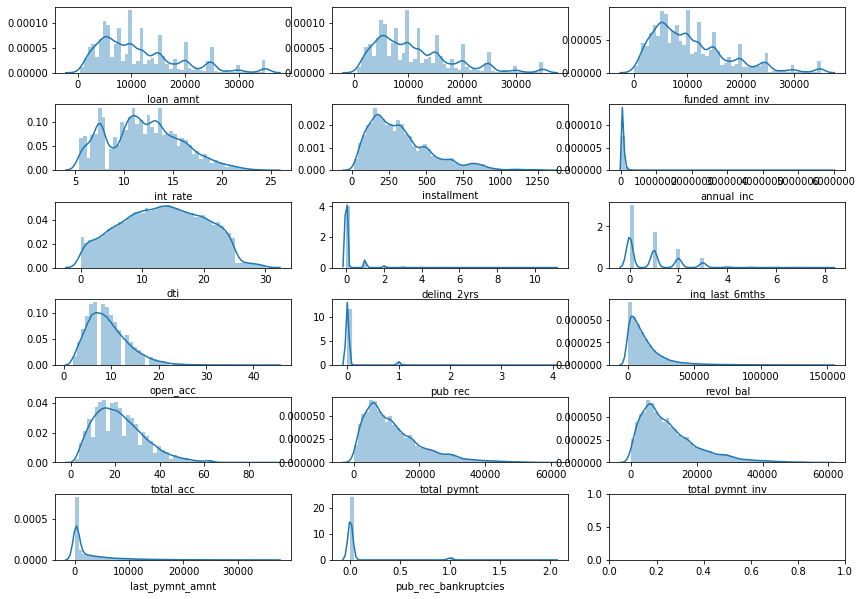

In [29]:
fig, axes = plt.subplots(nrows=6, ncols=3)
fig.set_size_inches(11.7, 8.27)
fig.tight_layout()
for a, col in enumerate(numeric_data.columns):
    sns.distplot(numeric_data[col], ax=axes[a//3,a%3])

#### Observations
* The loans applied by potential borrowers, the amount issued to the borrowers and the amount funded by investors are similarly distributed, meaning that it is most likely that qualified borrowers are going to get the loan they had applied for.

* open_acc and total_acc have same distribution.

## Segmented Analysis

### Distribution plot

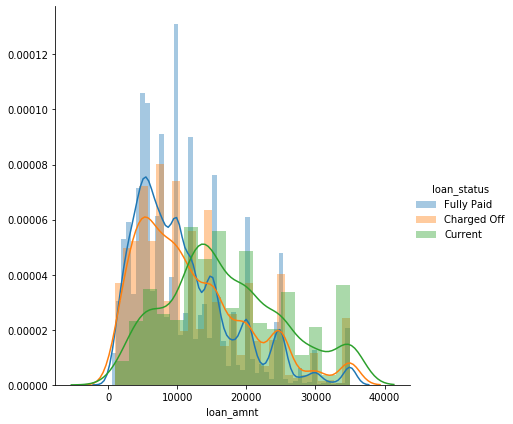

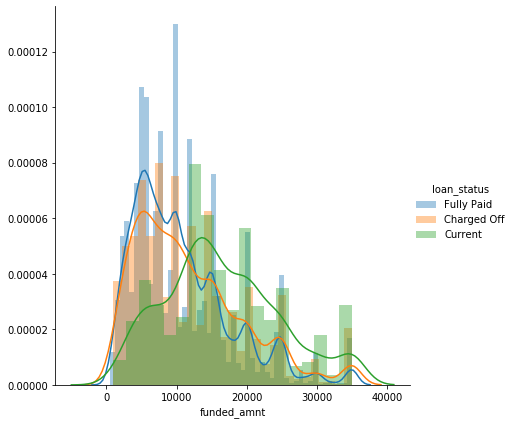

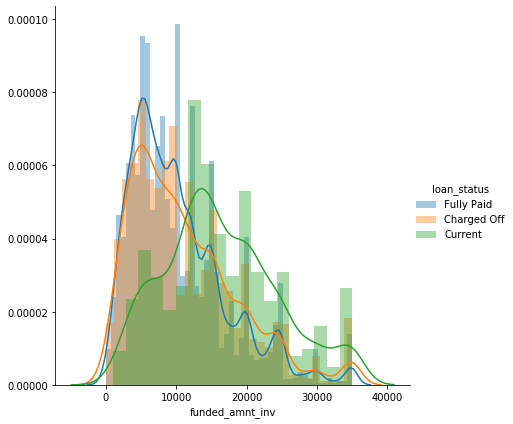

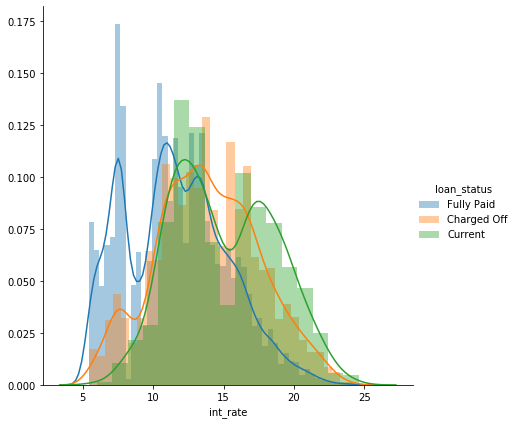

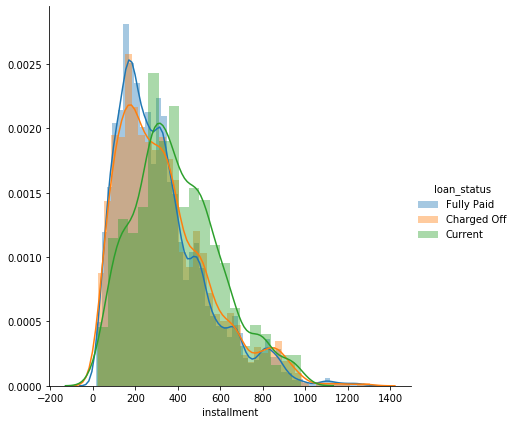

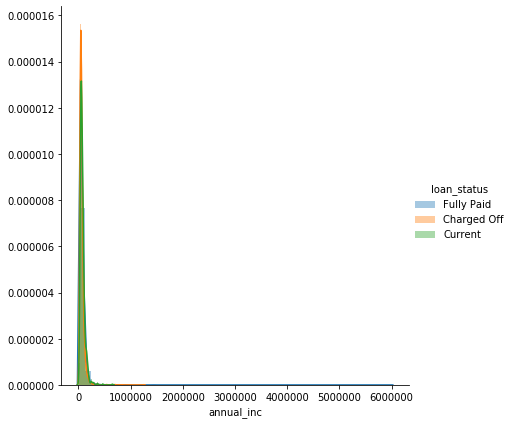

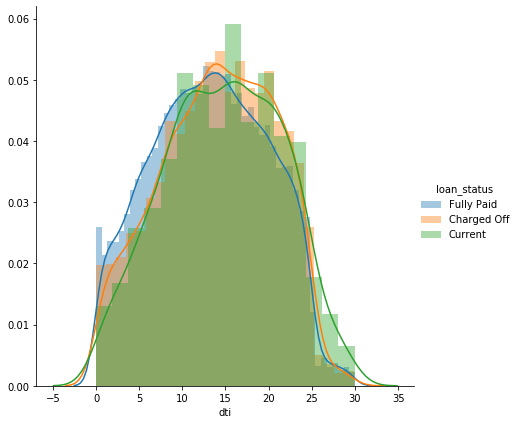

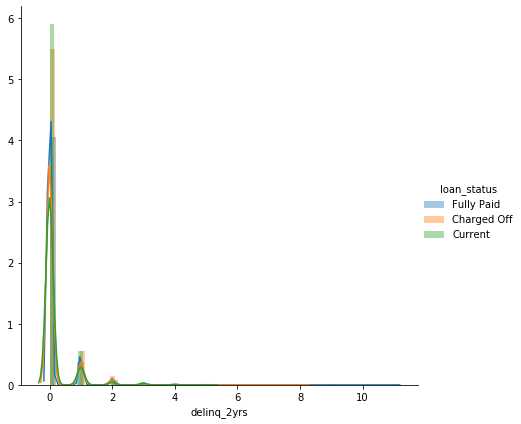

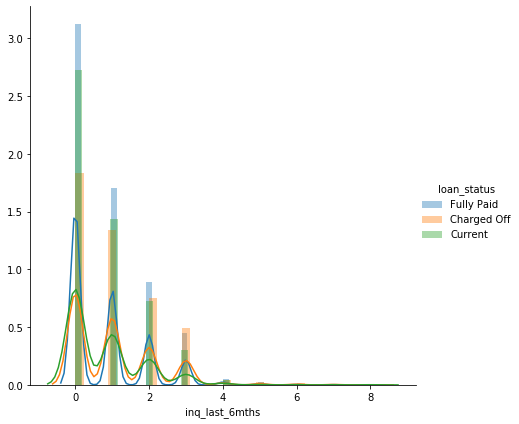

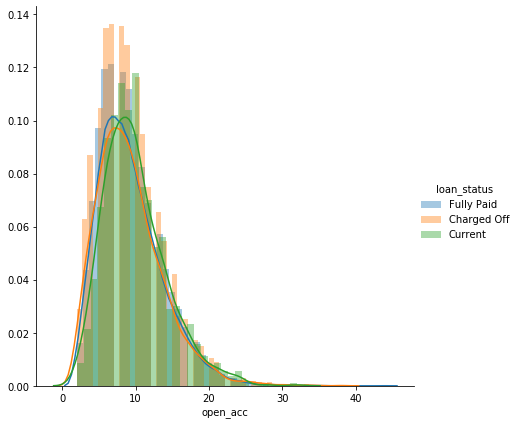

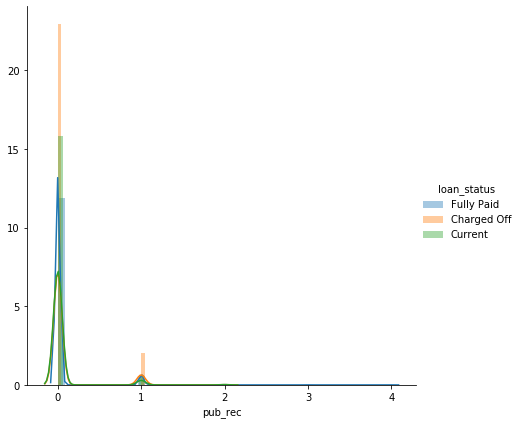

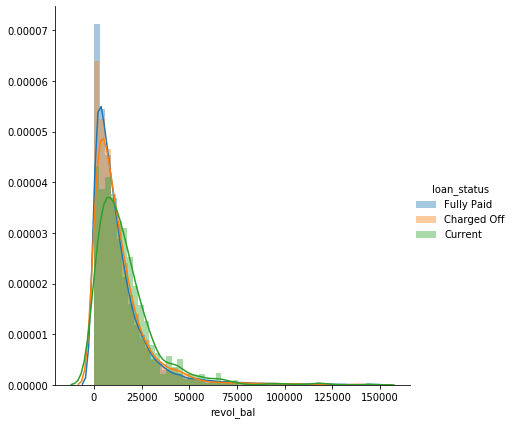

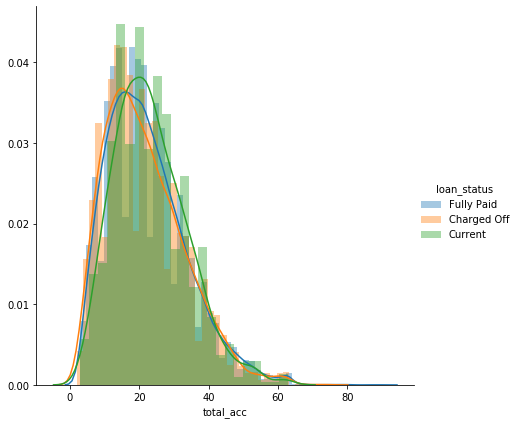

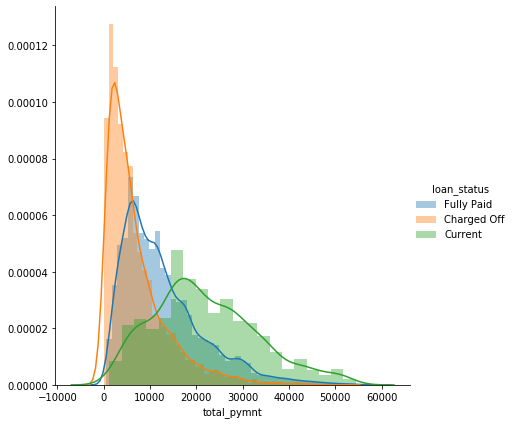

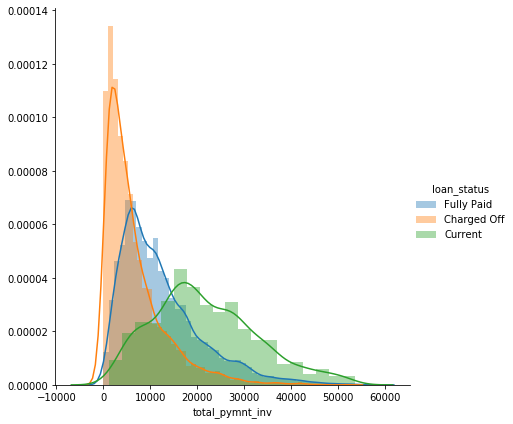

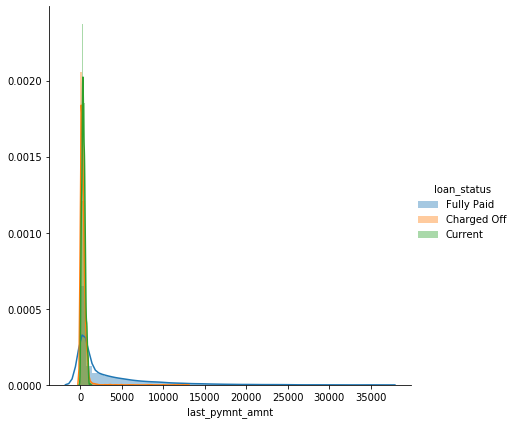

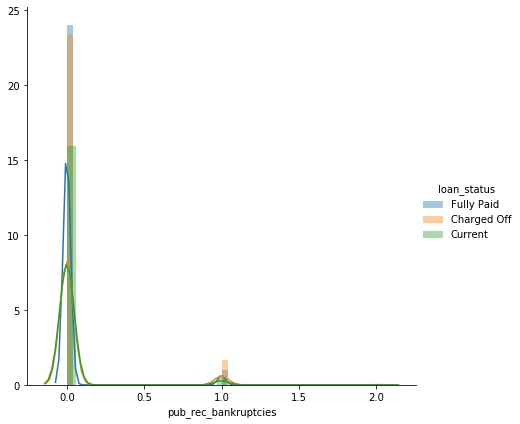

In [30]:
# distribution plot
for col in numeric_data.columns:
    sns.FacetGrid(loan, hue='loan_status', height=6) \
    .map(sns.distplot, col).add_legend()

#### Observations
* total_acc & open_acc & dti completely overlap and do not give useful oversight for different loan_status
* loan_amnt, funded_amnt, funded_amnt_inv

### Boxplot

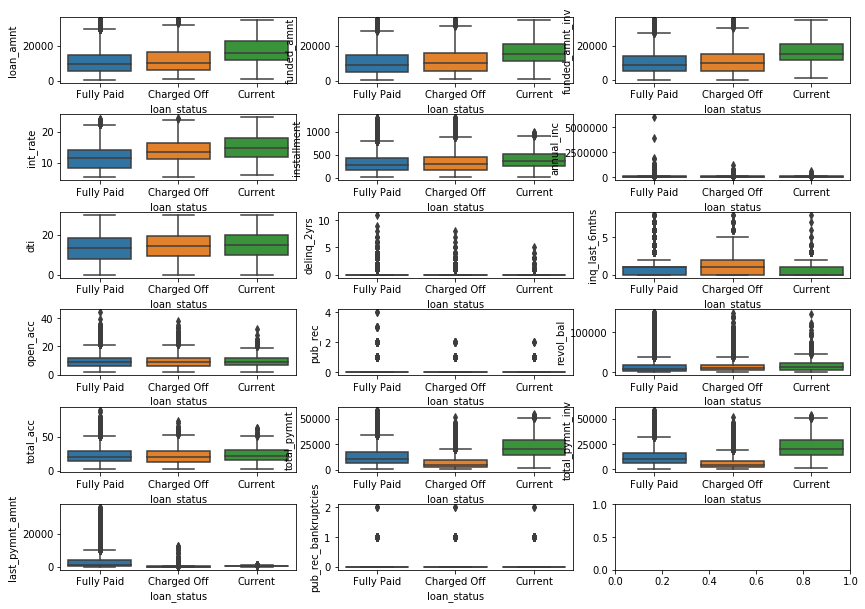

In [31]:
# boxplot
fig, axes = plt.subplots(nrows=6, ncols=3)
fig.set_size_inches(11.7, 8.27)
fig.tight_layout()
for a, col in enumerate(numeric_data.columns):
    # sns.boxplot(x='loan_status', y=col, data=loan, ax=axes[a//3,a%3])
    sns.boxplot(x='loan_status', y=col, data=loan, ax=axes[a//3,a%3])

### Summary
- There is some pattern in the interest rate for loan status. Charged-off mainly lies in the range of 15 around. Borrowers who completely paid off were the ones who took the loan on lower interest rate and borrowers who are currenlty paying have high interest rate.
- Annual income has some outliers which needs further analysis.

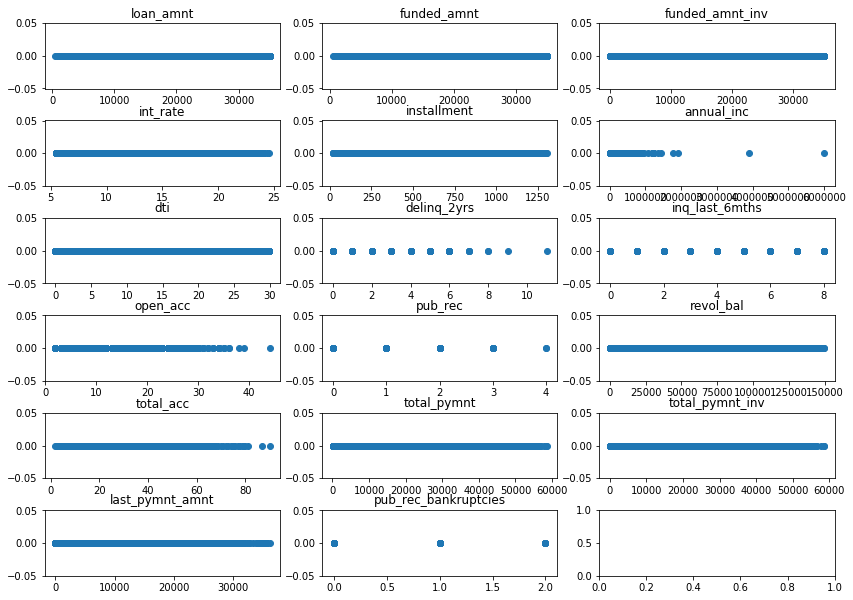

In [32]:
# OUTLIER ANALYSIS
fig, axes = plt.subplots(6,3)
fig.set_size_inches(11.7, 8.27)
fig.tight_layout()
for i, col in enumerate(numeric_data.columns):
    ax = axes[i//3, i%3]
    ax.scatter(x=loan[col], y=np.zeros_like(loan[col]))
    ax.set_title(col)

In [33]:
#### Outlier Handling

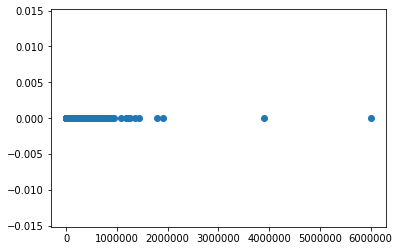

In [34]:
plt.scatter(x=loan['annual_inc'], y=np.zeros_like(loan['annual_inc']))

- Removing outliers on the basis of annual_inc
- Removing all the rows that lies outside the region of 3 times the standard deviation from the mean

In [35]:
loan = loan[np.abs(loan['annual_inc']-loan['annual_inc'].mean()) <= 3*loan['annual_inc'].std()]

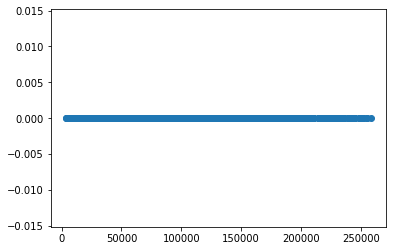

In [36]:
plt.scatter(x=loan['annual_inc'], y=np.zeros_like(loan['annual_inc']))

##### Observations
* As it can be observed from above scatter plot, the outliers have been completely removed from the dataset on the basis of annual inc of the borrowers.

### Countplot of some categorical variables 

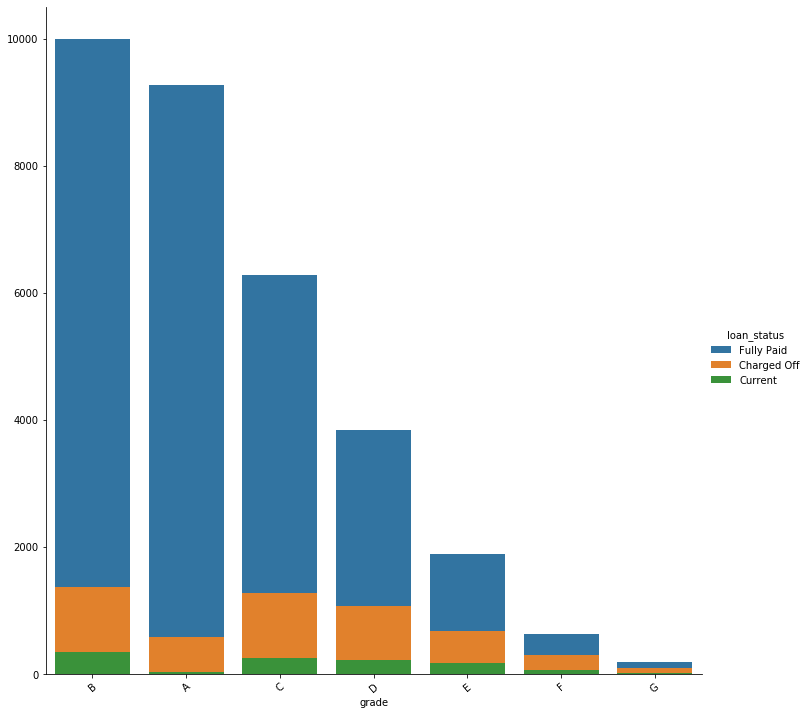

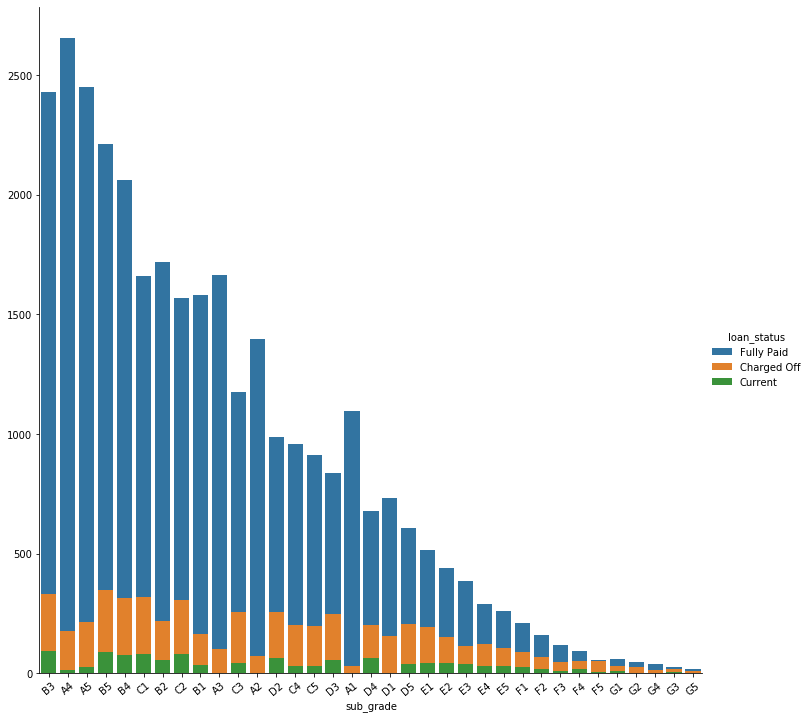

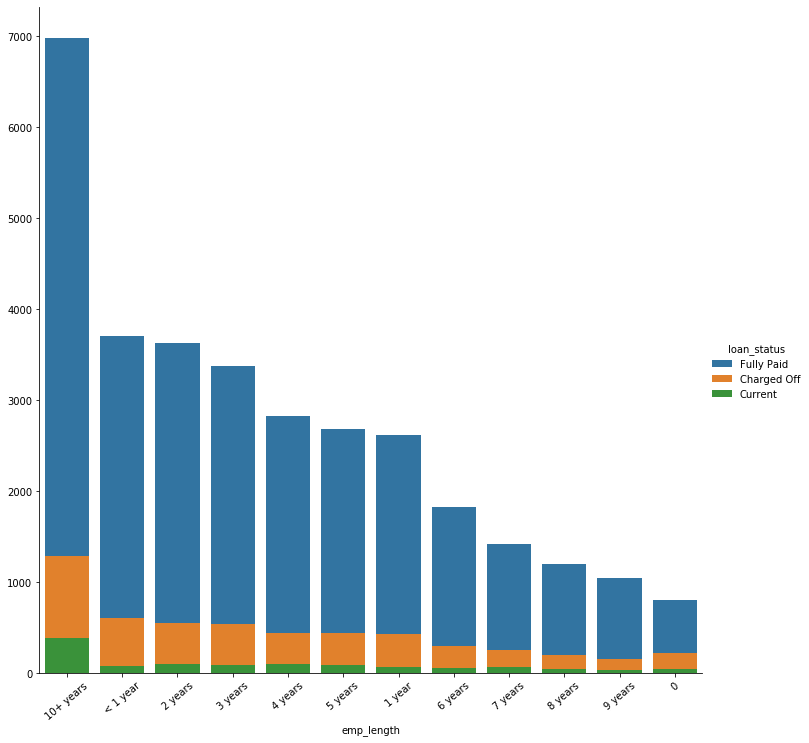

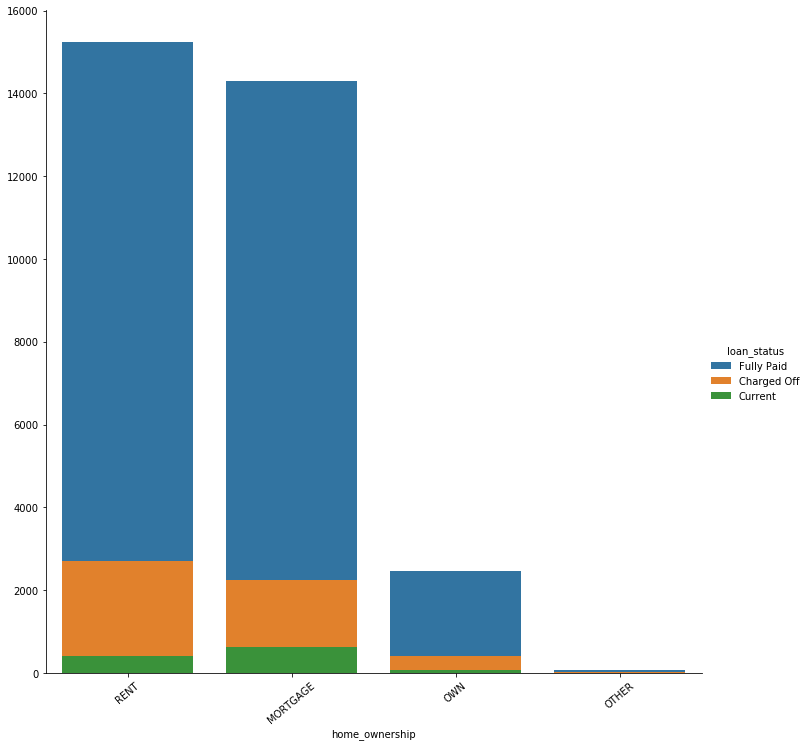

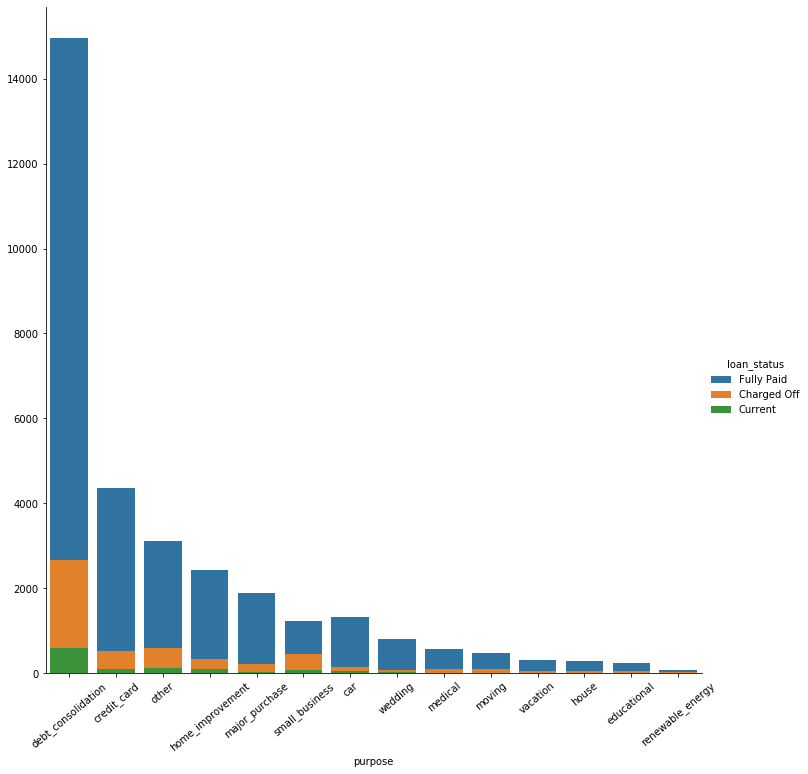

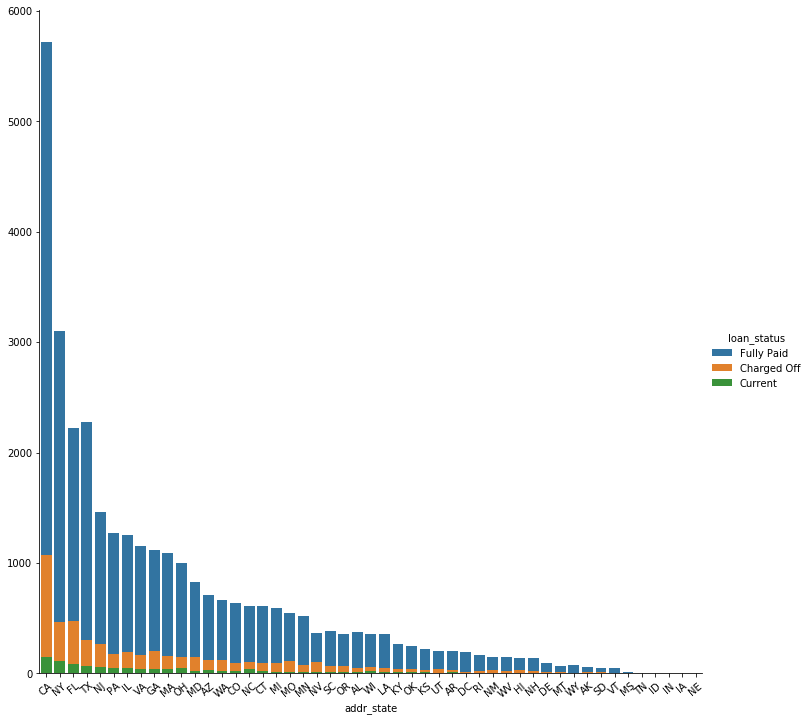

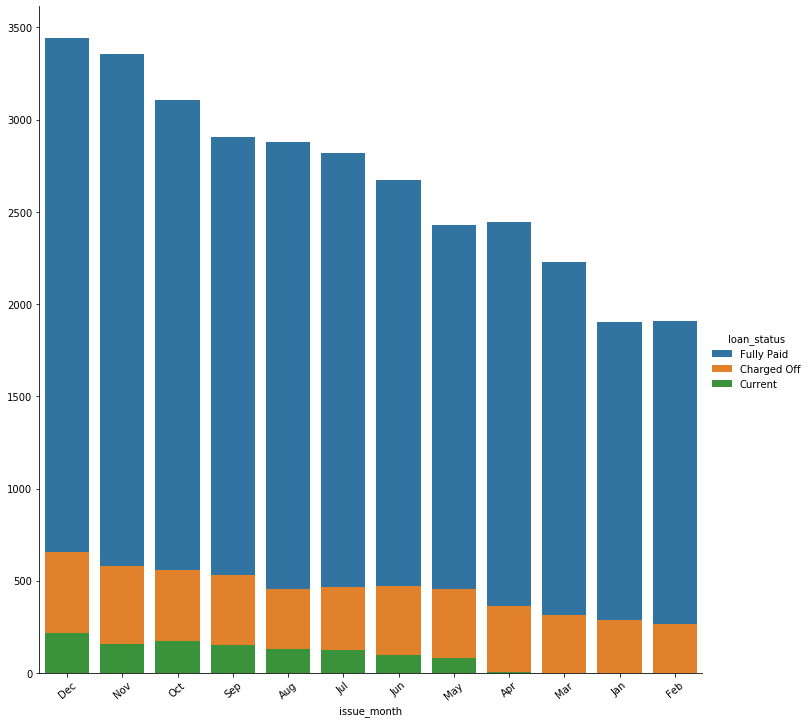

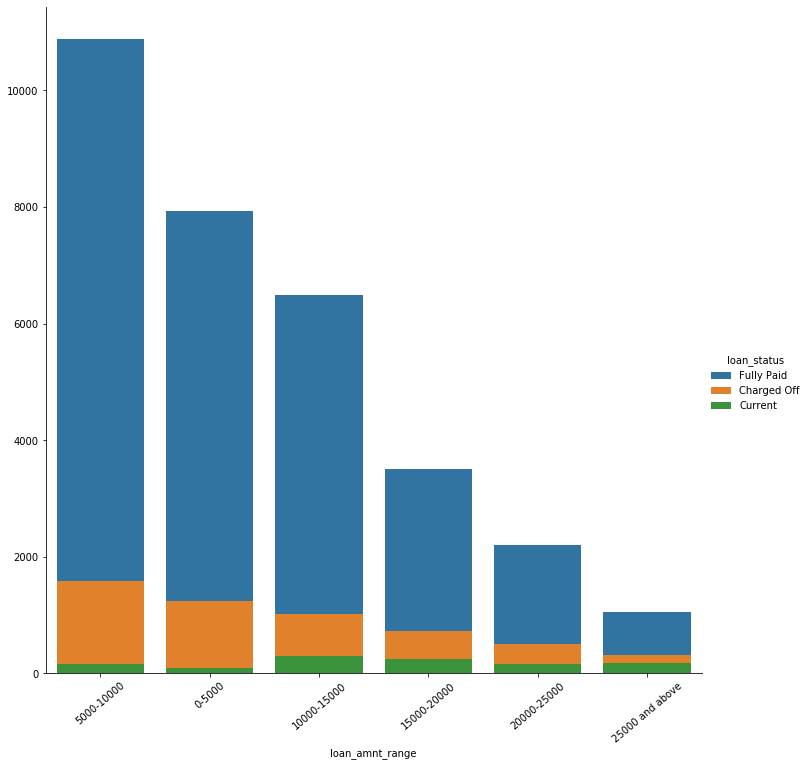

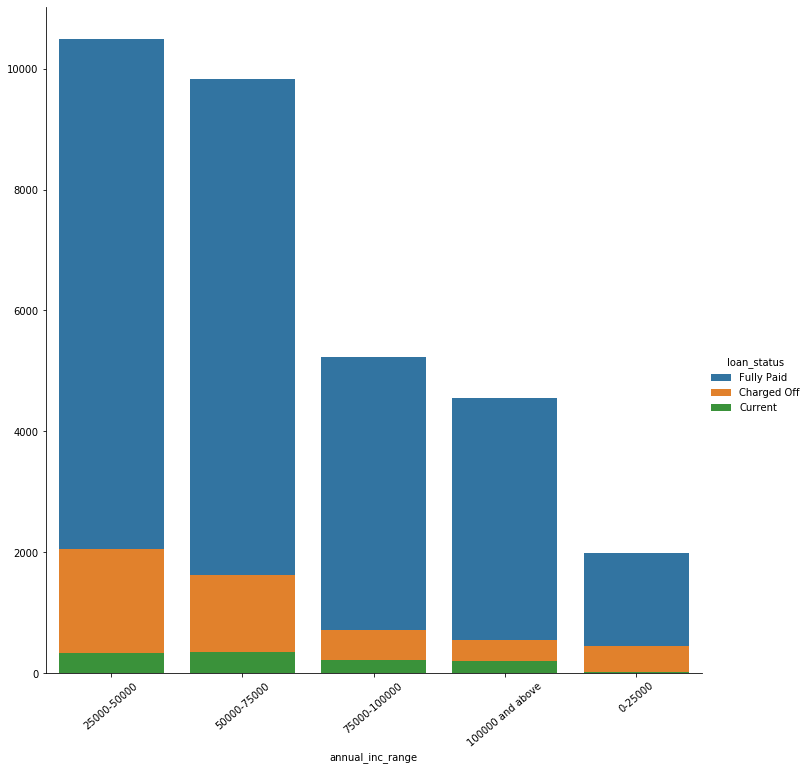

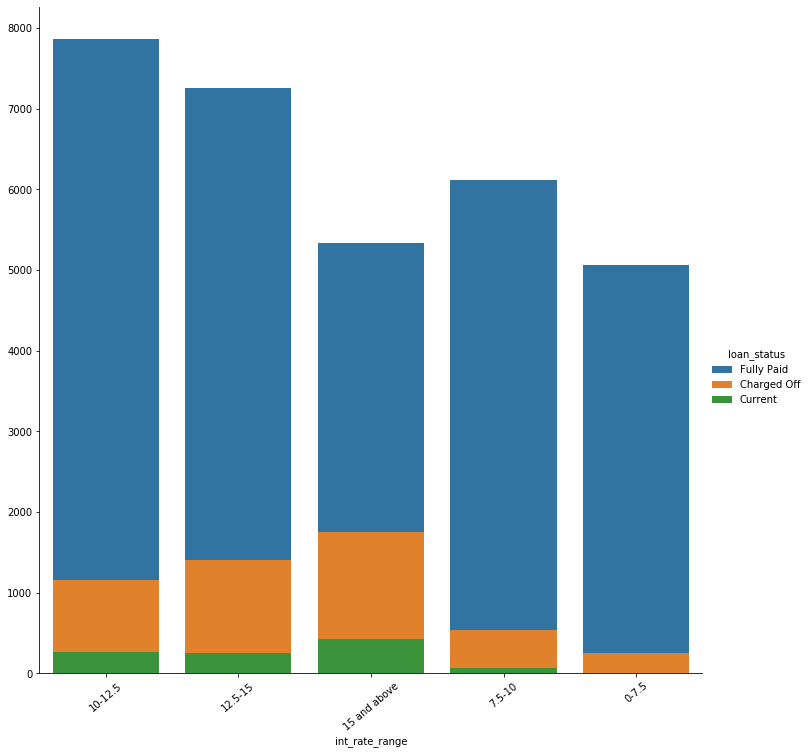

In [37]:
# countplot
cols = ['grade','sub_grade','emp_length','home_ownership','purpose','addr_state','issue_month',
       'loan_amnt_range','annual_inc_range','int_rate_range']
for col in cols:
    sns.FacetGrid(loan, hue='loan_status', height=10) \
    .map(sns.countplot, col, order = loan[col].value_counts().index).add_legend().set_xticklabels(rotation=40)

### Summary
* In **int_rate_range** of 15 & above, more people are likely to default.
* Most of the loans were issued in the month of December.
* Borrowers from **states** like NV, TN, SD, AK, FL are more likely to default.
* Most of the people who borrowed the loan for *wedding* or *car* or *major* **purposes** fully paid back the loan whereas who borrowed the loan for small_business or educational or renewable energy are more likely to default.
* People who mortgaged their home are more likely to repay the loan than who own house or living on rent (**home_ownership**)
* Lower **Grade** people belonging to F or G are mostly defaulters and lenders should avoid them giving loans.

# Bivariate Analysis

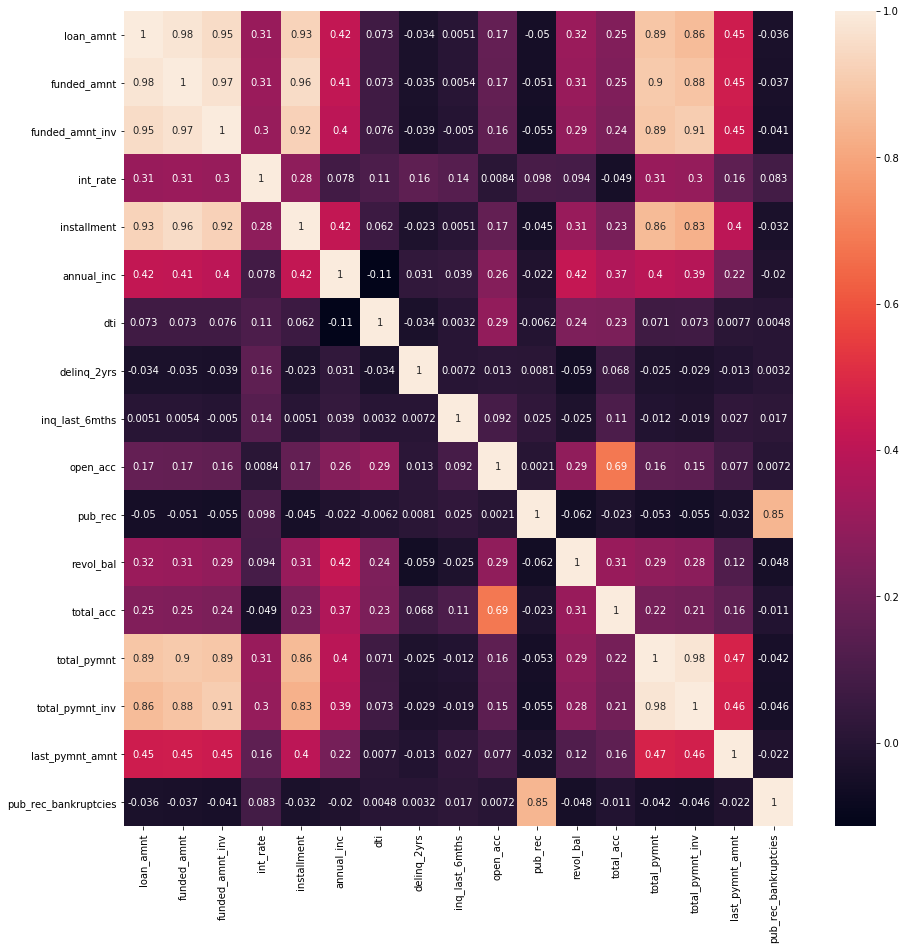

In [38]:
# correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(loan.corr(), annot=True)

##### Observations
1. loan_amnt, funded_amnt, funded_amnt_inv are highly correlated to other and hence, for analysis any one of them can be used. 
2. total_acc and open_acc are highly correlated as well as opening an account will also lead to increase in the count of total account.
3. pub_rec and pub_rec_bankruptcies are the variables that are highly correlated as entry of bankruptcies in public record will also lead to increase in public record.

#### Annual income range vs Loan status crosstab analysis

In [39]:
inc_status_crosstab = pd.crosstab(loan['annual_inc_range'], loan['loan_status'], margins=True)
inc_status_crosstab['percentage_of_charged_off'] = round(inc_status_crosstab['Charged Off'] \
                                                         /inc_status_crosstab['All']*100,2)
inc_status_crosstab

loan_status,Charged Off,Current,Fully Paid,All,percentage_of_charged_off
annual_inc_range,,,,,
0-25000,454,26,1983,2463,18.43
25000-50000,2058,329,10495,12882,15.98
50000-75000,1629,359,9829,6155,26.47
75000-100000,711,220,5224,11817,6.02
100000 and above,545,197,4554,5296,10.29
All,5397,1131,32085,38613,13.98


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb012e12400>],
      dtype=object)

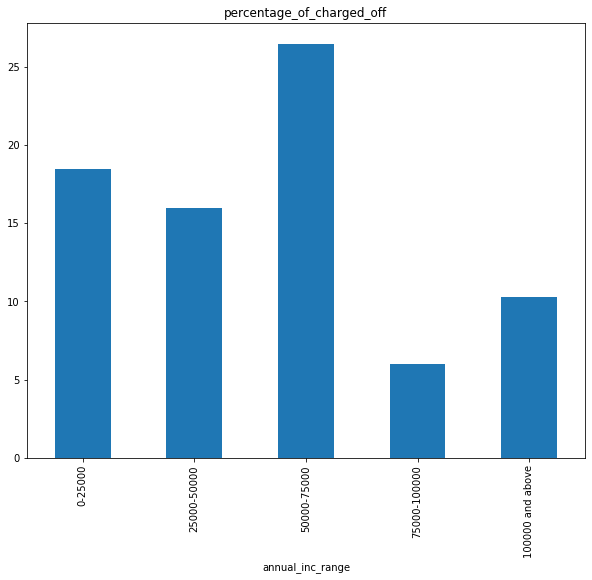

In [40]:
inc_status_crosstab = inc_status_crosstab.iloc[:-1,:]
inc_status_crosstab['percentage_of_charged_off'].plot(kind='bar', figsize=(10,8), subplots=True)

##### Observations
* Borrowers that have an annual income in the range of 50000-75000 were the most charged-off 

#### Interest Rate vs Loan status crosstab analysis

In [41]:
int_status_crosstab = pd.crosstab(loan['int_rate_range'], loan['loan_status'], margins=True)
int_status_crosstab['percentage_of_charged_off'] = round(int_status_crosstab['Charged Off'] \
                                                         /int_status_crosstab['All']*100,2)
int_status_crosstab = int_status_crosstab.iloc[:-1,:]
int_status_crosstab.sort_values('percentage_of_charged_off', ascending=False)

loan_status,Charged Off,Current,Fully Paid,All,percentage_of_charged_off
int_rate_range,,,,,
15 and above,1751,427,5340,6721,26.05
10-12.5,1156,269,7867,5321,21.73
12.5-15,1408,257,7251,9292,15.15
7.5-10,541,70,6110,8916,6.07
0-7.5,254,7,5060,7518,3.38


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb00caea898>],
      dtype=object)

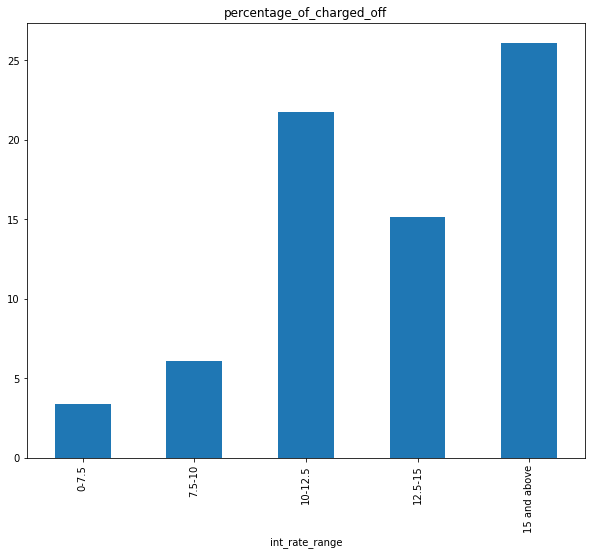

In [42]:
int_status_crosstab['percentage_of_charged_off'].plot(kind='bar', figsize=(10,8), subplots=True)

##### Observations
* Most of the borrowers defaulted when interest rate was higher than 15 and above.

#### Grade vs Loan status crosstab analysis

In [43]:
grade_status_crosstab = pd.crosstab(loan['grade'], loan['loan_status'], margins=True)
grade_status_crosstab['percentage_of_charged_off'] = round(grade_status_crosstab['Charged Off'] \
                                                         /grade_status_crosstab['All']*100,2)
grade_status_crosstab = grade_status_crosstab.iloc[:-1,:]
grade_status_crosstab.sort_values('percentage_of_charged_off', ascending=False)

loan_status,Charged Off,Current,Fully Paid,All,percentage_of_charged_off
grade,,,,,
G,95,17,189,301,31.56
F,305,72,635,1012,30.14
E,686,178,1884,2748,24.96
D,1067,218,3840,5125,20.82
C,1279,262,6273,7814,16.37
B,1375,344,10001,11720,11.73
A,590,40,9263,9893,5.96


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb012c42cc0>],
      dtype=object)

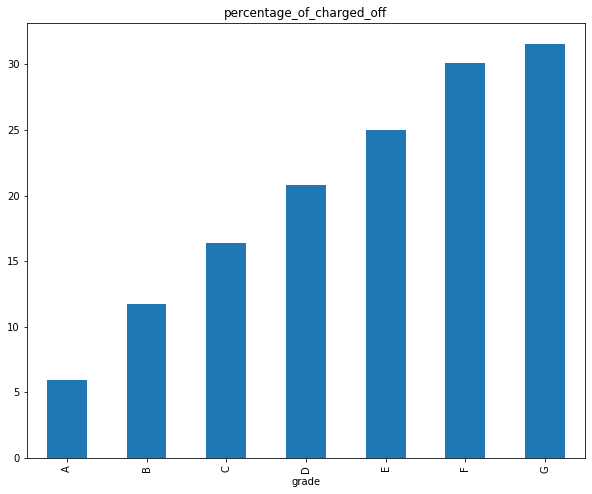

In [44]:
grade_status_crosstab['percentage_of_charged_off'].plot(kind='bar', figsize=(10,8), subplots=True)

##### Observations
* People belonging to lower grade ('E','F','G') are more likely to default.
* Grade of Borrowers is following a pattern in the sequence A, B, C, D, E, F, G. 
* A is the safest and G is the most riskiest grade for lending loan

#### Address State vs Loan status crosstab analysis

In [45]:
state_status_crosstab = pd.crosstab(loan['addr_state'], loan['loan_status'], margins=True)
state_status_crosstab['percentage_of_charged_off'] = round(state_status_crosstab['Charged Off'] \
                                                         /state_status_crosstab['All']*100,2)
state_status_crosstab = state_status_crosstab.iloc[:-1,]
state_status_crosstab.sort_values('percentage_of_charged_off', ascending=False)

loan_status,Charged Off,Current,Fully Paid,All,percentage_of_charged_off
addr_state,,,,,
NV,107,17,365,489,21.88
TN,2,0,8,10,20.00
SD,12,2,48,62,19.35
AK,14,2,62,78,17.95
FL,477,85,2226,2788,17.11
NM,30,5,145,180,16.67
MO,110,16,545,671,16.39
HI,28,8,136,172,16.28
OR,70,16,358,444,15.77


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb00c4ec6d8>],
      dtype=object)

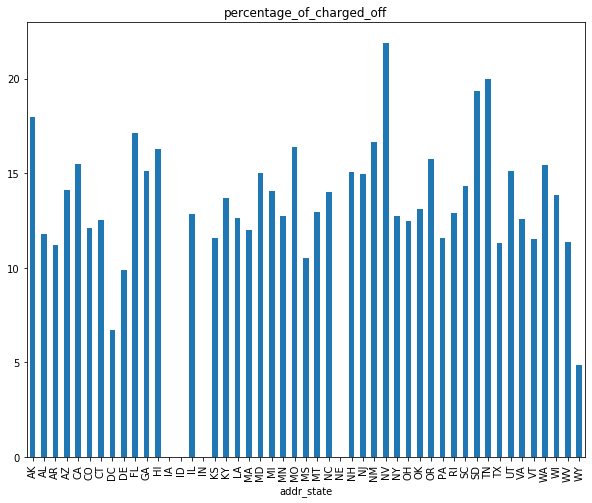

In [46]:
state_status_crosstab['percentage_of_charged_off'].plot(kind='bar', figsize=(10,8), subplots=True)

##### Observations
* People from the following states NV, TN, SD, AK, FL are more likely to be defaulter. This can be due to many reasons like expensive living, low employment rate etc. So, while lending loan, state should also be considered.

#### home ownership vs loan status crosstab analysis

In [47]:
home_status_crosstab = pd.crosstab(loan['home_ownership'], loan['loan_status'], margins=True)
home_status_crosstab['percentage_of_charged_off'] = round(home_status_crosstab['Charged Off'] \
                                                         /home_status_crosstab['All']*100,2)
home_status_crosstab = home_status_crosstab.iloc[:-1,]
home_status_crosstab.sort_values('percentage_of_charged_off', ascending=False)

loan_status,Charged Off,Current,Fully Paid,All,percentage_of_charged_off
home_ownership,,,,,
OTHER,18,0,77,95,18.95
RENT,2710,417,15246,18373,14.75
OWN,420,83,2461,2964,14.17
MORTGAGE,2249,631,14301,17181,13.09


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb00c16d080>],
      dtype=object)

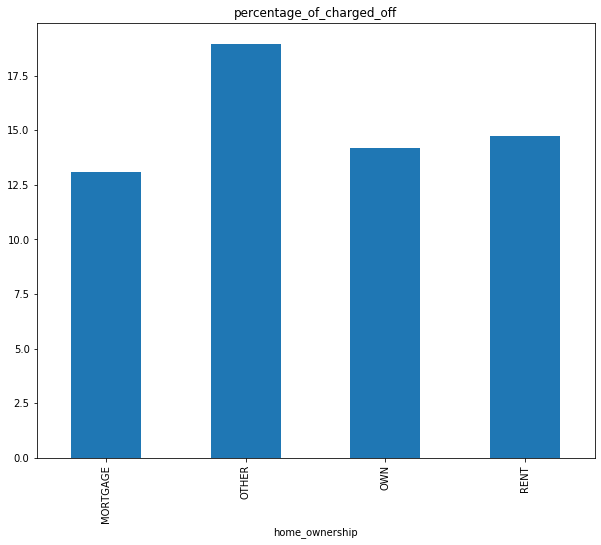

In [48]:
home_status_crosstab['percentage_of_charged_off'].plot(kind='bar', figsize=(10,8), subplots=True)

##### Observations
* Those borrowers who mortgaged their home are the safest for lending loans.
* Most of the borrowers with other as home ownership status were the ones who were mainly charged off.

#### purpose vs loan status crosstab analysis

In [49]:
purpose_status_crosstab = pd.crosstab(loan['purpose'], loan['loan_status'], margins=True)
purpose_status_crosstab['percentage_of_charged_off'] = round(purpose_status_crosstab['Charged Off'] \
                                                         /purpose_status_crosstab['All']*100,2)
purpose_status_crosstab = purpose_status_crosstab.iloc[:-1,]
purpose_status_crosstab.sort_values('percentage_of_charged_off', ascending=False)

loan_status,Charged Off,Current,Fully Paid,All,percentage_of_charged_off
purpose,,,,,
small_business,447,74,1228,1749,25.56
renewable_energy,18,1,81,100,18.00
educational,50,0,250,300,16.67
other,604,127,3113,3844,15.71
moving,88,7,472,567,15.52
medical,104,12,560,676,15.38
house,55,14,298,367,14.99
debt_consolidation,2673,582,14948,18203,14.68
vacation,53,6,315,374,14.17


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb00c1d2278>],
      dtype=object)

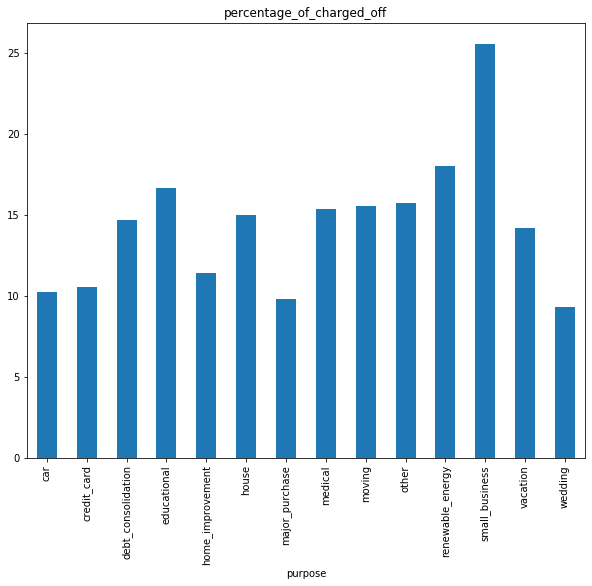

In [50]:
purpose_status_crosstab['percentage_of_charged_off'].plot(kind='bar', figsize=(10,8), subplots=True)

##### Observation
* Above graph clearly indicates that the borrowers who borrowed loan for the purpose of **small business** or **educational loan** were the main defaulters. If lenders want to avoid the risk should exempt from giving loans for small business or educational purposes.

#### employment length vs loan status crosstab analysis

In [51]:
emplen_status_crosstab = pd.crosstab(loan['emp_length'], loan['loan_status'], margins=True)
emplen_status_crosstab['percentage_of_charged_off'] = round(emplen_status_crosstab['Charged Off'] \
                                                         /emplen_status_crosstab['All']*100,2)
emplen_status_crosstab = emplen_status_crosstab.iloc[:-1,]
emplen_status_crosstab.sort_values('percentage_of_charged_off', ascending=False)

loan_status,Charged Off,Current,Fully Paid,All,percentage_of_charged_off
emp_length,,,,,
0,221,42,800,1063,20.79
10+ years,1282,388,6974,8644,14.83
7 years,256,62,1417,1735,14.76
1 year,429,69,2612,3110,13.79
5 years,441,87,2686,3214,13.72
< 1 year,600,74,3702,4376,13.71
8 years,196,43,1198,1437,13.64
6 years,296,60,1823,2179,13.58
3 years,539,83,3373,3995,13.49


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb00c382160>],
      dtype=object)

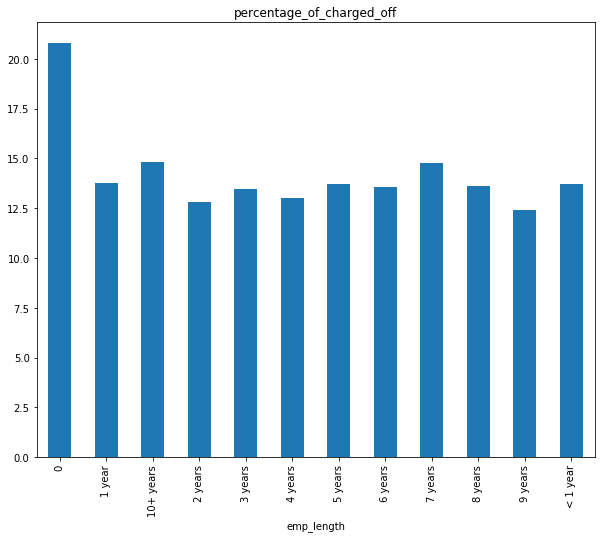

In [52]:
emplen_status_crosstab['percentage_of_charged_off'].plot(kind='bar', figsize=(10,8), subplots=True)

##### Observations
* Borrowers whose employment length is not known have maximum (around 21%) chances of being a defaulter. Hence, it employment length should be kept in mind while lending a loan

#### term vs loan status crosstab analysis

In [53]:
term_status_crosstab = pd.crosstab(loan['term'], loan['loan_status'], margins=True)
term_status_crosstab['percentage_of_charged_off'] = round(term_status_crosstab['Charged Off'] \
                                                         /term_status_crosstab['All']*100,2)
term_status_crosstab = term_status_crosstab.iloc[:-1,]
term_status_crosstab.sort_values('percentage_of_charged_off', ascending=False)

loan_status,Charged Off,Current,Fully Paid,All,percentage_of_charged_off
term,,,,,
60 months,2367,1131,7014,10512,22.52
36 months,3030,0,25071,28101,10.78


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0157ed048>],
      dtype=object)

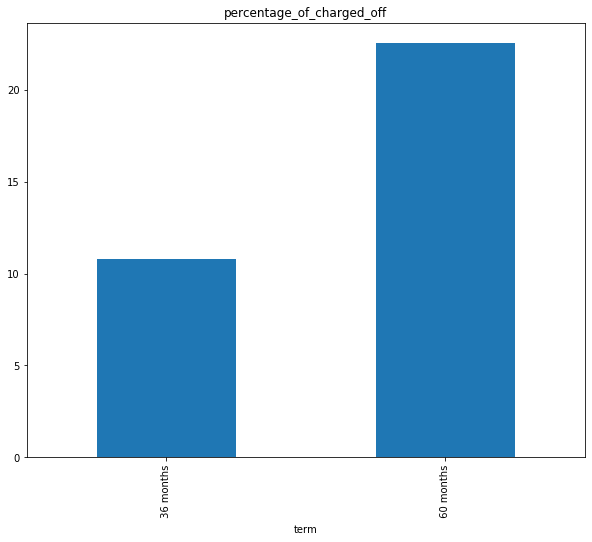

In [54]:
term_status_crosstab['percentage_of_charged_off'].plot(kind='bar', figsize=(10,8), subplots=True)

##### Observations
* Borrowers who borrowed loan for longer term (60 months) are more likely (22-23% percentage of chances) to become a defaulter as compare to 36 months term borrowers. 

# Conclusion

The features that can be useful in analyzing whether an loan applicant can be a defaulter or not are 
1. grade
2. int_rate_range
3. addr_state
4. purpose 
5. term
6. emp_length



* A, B & C grade borrowers are safe options for lending loan
* Higher Interest rates are more riskier for lending loan
* Lending loan to people from the following states NV, TN, SD, AK, FL can be riskier. 
* Loan borrowed for the purpose of small business, renewable energy and educational loans are riskier. 
* Loan taken for longer term are more likely to get defaulter than shorter term.
* Lending loans to borrowers whose employment length is not known is riskier. 